In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score, accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

## 1. Import Data

In [3]:
df = pd.read_csv('customer-Churn-Records.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [4]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [6]:
df.dtypes

RowNumber               int64
CustomerId              int64
Surname                object
CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object

In [7]:
df.shape

(10000, 18)

## 2. Preprocessing

### 2.1. Data Cleaning

In [10]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


### 2.2. Handle NA

In [12]:
df.isnull().sum()

CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

### 2.3. Distinguish Unique

In [14]:
df["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [15]:
df["Gender"].unique()

array(['Female', 'Male'], dtype=object)

In [16]:
df["Card Type"].unique()

array(['DIAMOND', 'GOLD', 'SILVER', 'PLATINUM'], dtype=object)

### 2.4. Label Encoding

In [18]:
# le = LabelEncoder()
# # Label Encoding will be used for columns with 2 or less unique
# le_count = 0
# for col in df.columns[1:]:
#       if df[col].dtype == 'object':
#            if len(list(df[col].unique())) <= 2:
#                 le.fit(df[col])
#                 df[col] = le.transform(df[col])
#                 le_count += 1
# print('{} columns were label encoded.'.format(le_count))
# # Female:0, Male:1

df["Gender"] = df["Gender"].map({"Male":0, "Female":1})
df.head(20)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,1,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,1,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,1,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
5,645,Spain,0,44,8,113755.78,2,1,0,149756.71,1,1,5,DIAMOND,484
6,822,France,0,50,7,0.00,2,1,1,10062.80,0,0,2,SILVER,206
7,376,Germany,1,29,4,115046.74,4,1,0,119346.88,1,1,2,DIAMOND,282
8,501,France,0,44,4,142051.07,2,0,1,74940.50,0,0,3,GOLD,251
9,684,France,0,27,2,134603.88,1,1,1,71725.73,0,0,3,GOLD,342


## 3. Exploratory Data Analysis

### (1) Churn Distribution

In [21]:
df["Exited"].value_counts()

Exited
0    7962
1    2038
Name: count, dtype: int64

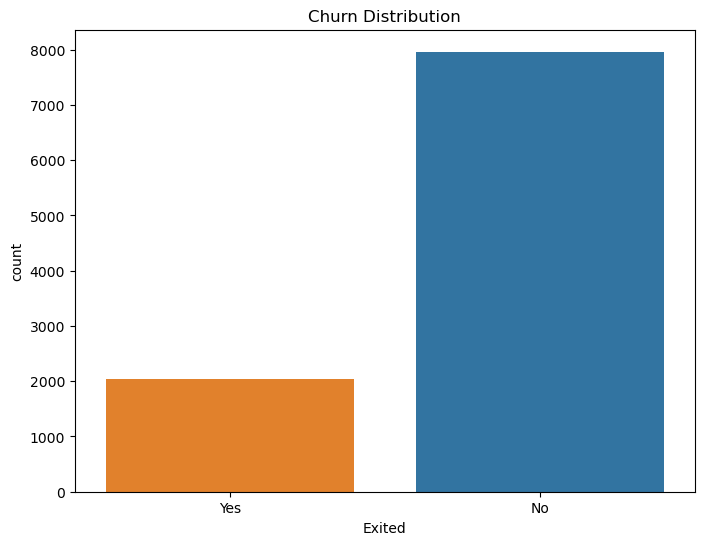

In [22]:
df_encoded = df.copy()
df_encoded["Exited"] = df_encoded["Exited"].map({0:"No", 1:"Yes"})

plt.figure(figsize=(8, 6))
sns.countplot(x ='Exited', hue = "Exited", data = df_encoded, palette=['#FF7F0e', '#1F77B4'])
plt.title('Churn Distribution')
plt.show()

### (2) Churn by Geography

Geography
France     16.174711
Germany    32.443204
Spain      16.673395
dtype: float64


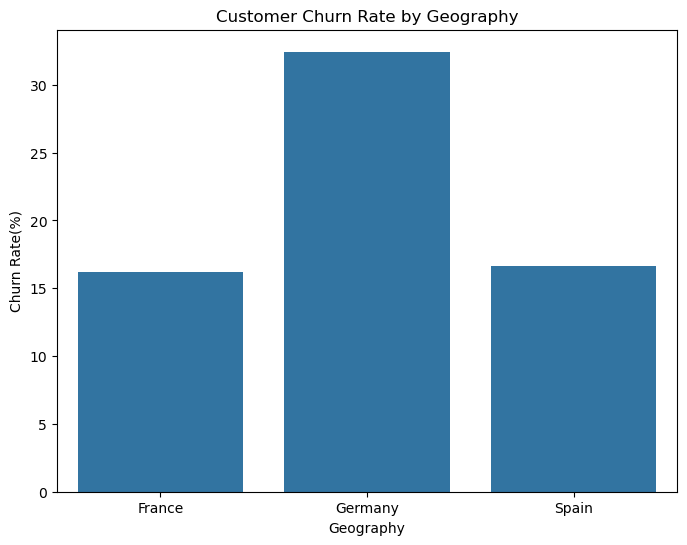

In [24]:
df_e = df[df['Exited'] == 1]

df_total = df.groupby('Geography').size()
df_churn_count = df_e.groupby('Geography').size()
df_churn_rate = (df_churn_count / df_total) * 100
print(df_churn_rate)

churn_rate_df = pd.DataFrame(df_churn_rate).reset_index()
churn_rate_df.columns = ['Geography', 'Churn Rate(%)']

plt.figure(figsize=(8, 6))
sns.barplot(x='Geography', y='Churn Rate(%)', data=churn_rate_df)
plt.title('Customer Churn Rate by Geography')
plt.show()

### (3) Churn by Gender

Gender
Female    25.071539
Male      16.474253
dtype: float64


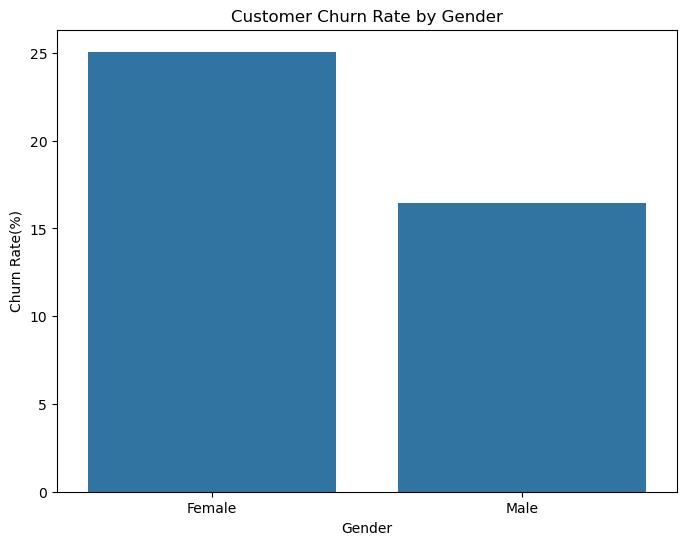

In [26]:
df_encoded = df.copy()
df_encoded["Gender"] = df_encoded["Gender"].map({0:"Male", 1:"Female"})

df_e = df_encoded[df_encoded['Exited'] == 1]

df_total = df_encoded.groupby('Gender').size()
df_churn_count = df_e.groupby('Gender').size()
df_churn_rate = (df_churn_count / df_total) * 100
print(df_churn_rate)

churn_rate_df = pd.DataFrame(df_churn_rate).reset_index()
churn_rate_df.columns = ['Gender', 'Churn Rate(%)']

plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='Churn Rate(%)', data=churn_rate_df)
plt.title('Customer Churn Rate by Gender')
plt.show()

### (4) Churn by Age

Age_Group
10-20     5.617978
20-30     7.610431
30-40    12.109638
40-50    33.965517
50-60    56.210790
60-70    31.419940
70+       8.270677
dtype: float64


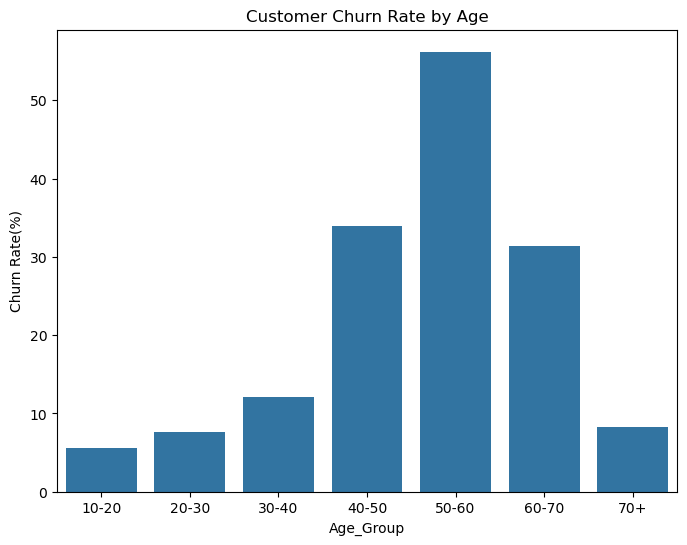

In [28]:
df_encoded = df.copy()

bins = [10, 20, 30, 40, 50, 60, 70, np.inf]
labels = ['10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70+']
df_encoded['Age_Group'] = pd.cut(df_encoded['Age'], bins=bins, labels=labels)

df_e = df_encoded[df_encoded['Exited'] == 1]

df_total = df_encoded.groupby('Age_Group', observed=False).size()
df_churn_count = df_e.groupby('Age_Group', observed=False).size()
df_churn_rate = (df_churn_count / df_total) * 100
print(df_churn_rate)

churn_rate_df = pd.DataFrame(df_churn_rate).reset_index()
churn_rate_df.columns = ['Age_Group', 'Churn Rate(%)']

plt.figure(figsize=(8, 6))
sns.barplot(x='Age_Group', y='Churn Rate(%)', data=churn_rate_df)
plt.title('Customer Churn Rate by Age')
plt.show()

### (5) Churn by Balance

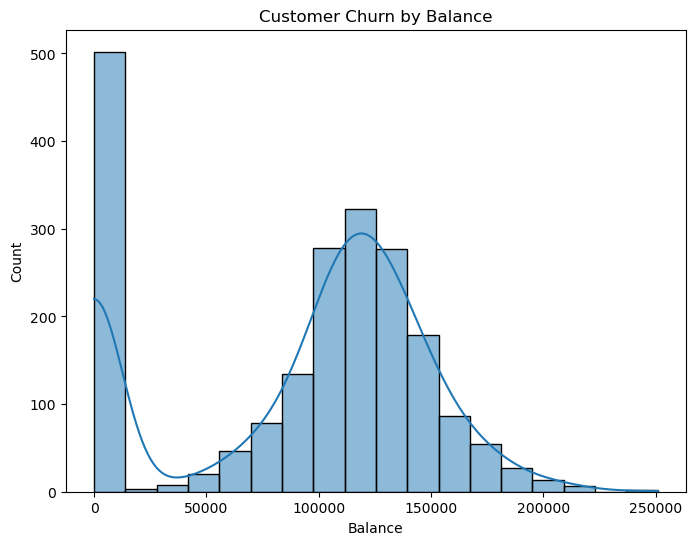

In [30]:
df_e = df[df['Exited'] == 1]
plt.figure(figsize=(8, 6))
sns.histplot(df_e['Balance'], kde=True)
plt.title('Customer Churn by Balance')
plt.show()

IsActiveMember
No     320
Yes    180
dtype: int64


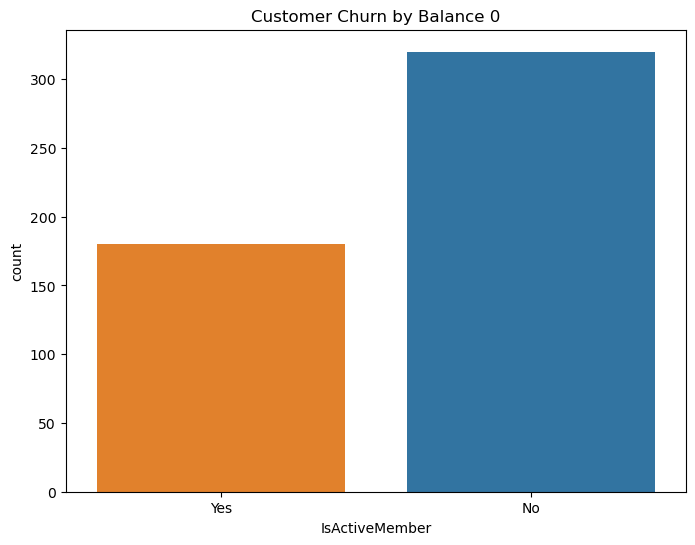

In [31]:
df_encoded = df.copy()
df_encoded["Exited"] = df_encoded["Exited"].map({0:"No", 1:"Yes"})
df_encoded["IsActiveMember"] = df_encoded["IsActiveMember"].map({0:"No", 1:"Yes"})

df_e = df_encoded[(df_encoded['Exited'] == "Yes") & (df_encoded['Balance'] == 0)]

plt.figure(figsize=(8, 6))
sns.countplot(x='IsActiveMember', hue='IsActiveMember', data = df_e, palette=['#FF7F0e', '#1F77B4'])
df_churn_count = df_e.groupby('IsActiveMember').size()
print(df_churn_count)
plt.title('Customer Churn by Balance 0')
plt.show()

### (6) Churn by Number of Products

NumOfProducts
1     27.714398
2      7.603486
3     82.706767
4    100.000000
dtype: float64


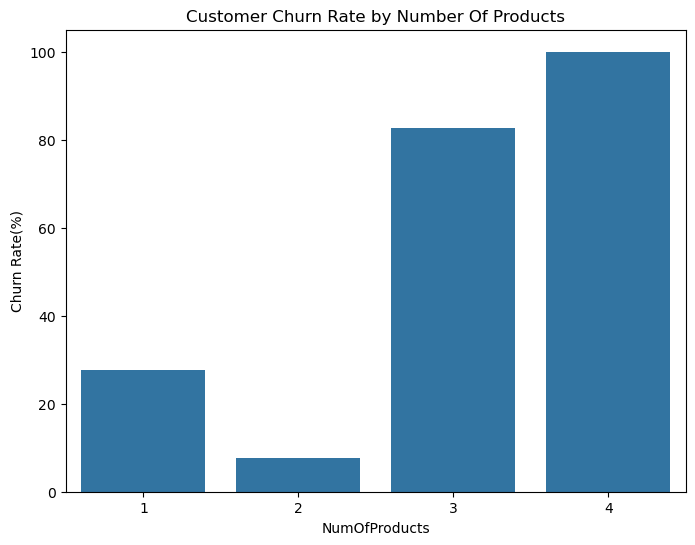

In [33]:
df_e = df[df['Exited'] == 1]
 
df_total = df.groupby('NumOfProducts').size()
df_churn_count = df_e.groupby('NumOfProducts').size()
# print(df_total)
# print(df_churn_count)
df_churn_rate = (df_churn_count / df_total) * 100
print(df_churn_rate)

churn_rate_df = pd.DataFrame(df_churn_rate).reset_index()
churn_rate_df.columns = ['NumOfProducts', 'Churn Rate(%)']

plt.figure(figsize=(8, 6))
sns.barplot(x='NumOfProducts', y='Churn Rate(%)', data=churn_rate_df)
plt.title('Customer Churn Rate by Number Of Products')
plt.show()

### (7) Churn by Has Credit Card

HasCrCard
No     20.814941
Yes    20.198441
dtype: float64


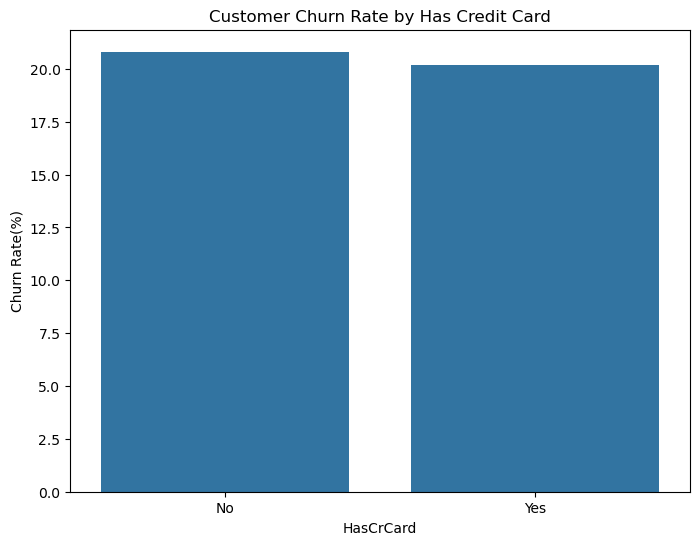

In [35]:
df_encoded = df.copy()
df_encoded["HasCrCard"] = df_encoded["HasCrCard"].map({0:"No", 1:"Yes"})

df_e = df_encoded[df_encoded['Exited'] == 1]

df_total = df_encoded.groupby('HasCrCard').size()
df_churn_count = df_e.groupby('HasCrCard').size()
# print(df_total)
# print(df_churn_count)
df_churn_rate = (df_churn_count / df_total) * 100
print(df_churn_rate)

churn_rate_df = pd.DataFrame(df_churn_rate).reset_index()
churn_rate_df.columns = ['HasCrCard', 'Churn Rate(%)']

plt.figure(figsize=(8, 6))
sns.barplot(x='HasCrCard', y='Churn Rate(%)', data=churn_rate_df)
plt.title('Customer Churn Rate by Has Credit Card')
plt.show()

### (8) Churn by Is Active Member

IsActiveMember
No     26.871520
Yes    14.269074
dtype: float64


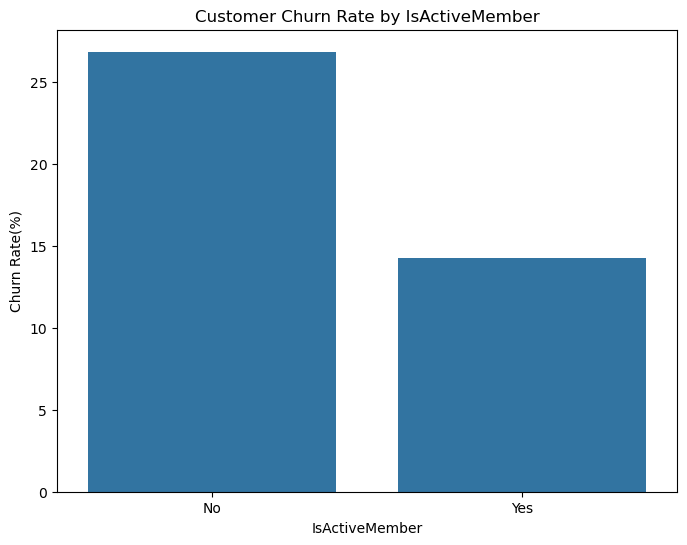

In [37]:
df_encoded = df.copy()
df_encoded["IsActiveMember"] = df_encoded["IsActiveMember"].map({0:"No", 1:"Yes"})

df_e = df_encoded[df_encoded['Exited'] == 1]

df_total = df_encoded.groupby('IsActiveMember').size()
df_churn_count = df_e.groupby('IsActiveMember').size()
# print(df_total)
# print(df_churn_count)
df_churn_rate = (df_churn_count / df_total) * 100
print(df_churn_rate)

churn_rate_df = pd.DataFrame(df_churn_rate).reset_index()
churn_rate_df.columns = ['IsActiveMember', 'Churn Rate(%)']

plt.figure(figsize=(8, 6))
sns.barplot(x='IsActiveMember', y='Churn Rate(%)', data=churn_rate_df)
plt.title('Customer Churn Rate by IsActiveMember')
plt.show()

### (9) Churn by Complain

Complain
No      0.050277
Yes    99.510763
dtype: float64


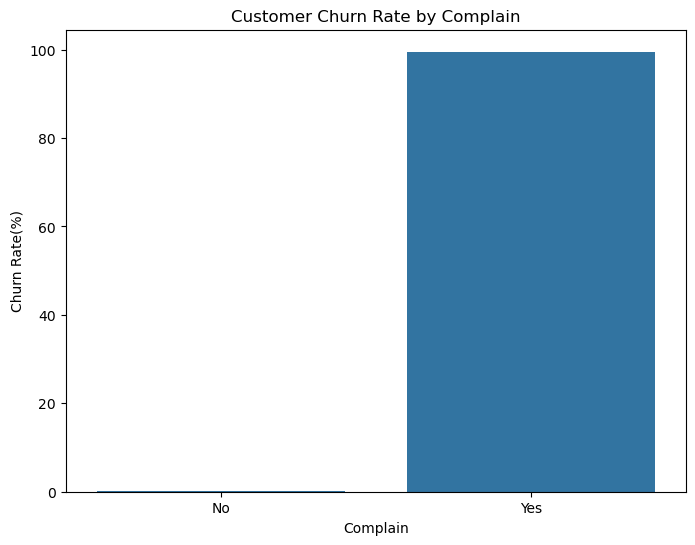

In [39]:
df_encoded = df.copy()
df_encoded["Complain"] = df_encoded["Complain"].map({0:"No", 1:"Yes"})

df_e = df_encoded[df_encoded['Exited'] == 1]

df_total = df_encoded.groupby('Complain').size()
df_churn_count = df_e.groupby('Complain').size()
# print(df_total)
# print(df_churn_count)
df_churn_rate = (df_churn_count / df_total) * 100
print(df_churn_rate)

churn_rate_df = pd.DataFrame(df_churn_rate).reset_index()
churn_rate_df.columns = ['Complain', 'Churn Rate(%)']

plt.figure(figsize=(8, 6))
sns.barplot(x='Complain', y='Churn Rate(%)', data=churn_rate_df)
plt.title('Customer Churn Rate by Complain')
plt.show()

### (10) Churn by Satisfaction Score

Satisfaction Score
1    20.031056
2    21.797418
3    19.637610
4    20.617530
5    19.810379
dtype: float64


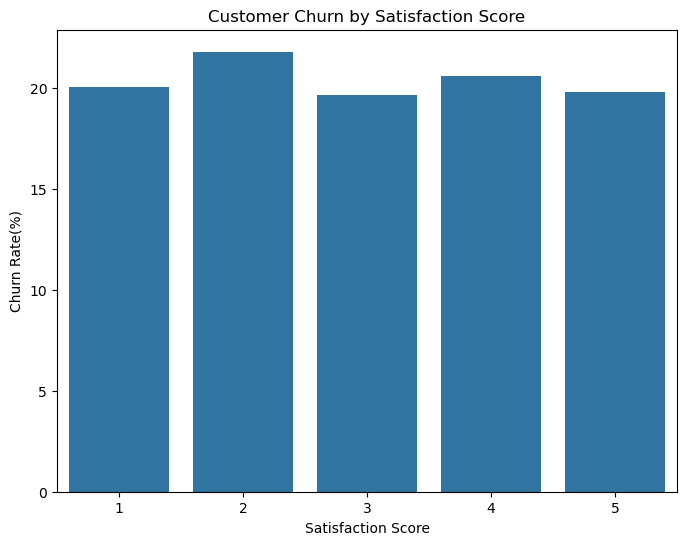

In [41]:
df_e = df[df['Exited'] == 1]

df_total = df.groupby('Satisfaction Score').size()
df_churn_count = df_e.groupby('Satisfaction Score').size()
# print(df_total)
# print(df_churn_count)
df_churn_rate = (df_churn_count / df_total) * 100
print(df_churn_rate)

churn_rate_df = pd.DataFrame(df_churn_rate).reset_index()
churn_rate_df.columns = ['Satisfaction Score', 'Churn Rate(%)']

plt.figure(figsize=(8, 6))
sns.barplot(x='Satisfaction Score', y='Churn Rate(%)', data=churn_rate_df)
plt.title('Customer Churn by Satisfaction Score')
plt.show()

### (11) Churn by Card Type

Card Type
DIAMOND     21.779019
GOLD        19.264588
PLATINUM    20.360721
SILVER      20.112179
dtype: float64


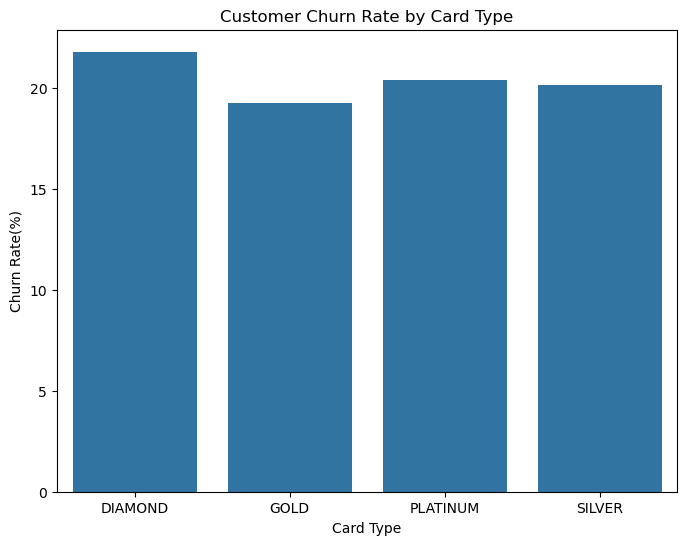

In [43]:
df_e = df[df['Exited'] == 1]

df_total = df.groupby('Card Type').size()
df_churn_count = df_e.groupby('Card Type').size()
# print(df_total)
# print(df_churn_count)
df_churn_rate = (df_churn_count / df_total) * 100
print(df_churn_rate)

churn_rate_df = pd.DataFrame(df_churn_rate).reset_index()
churn_rate_df.columns = ['Card Type', 'Churn Rate(%)']

plt.figure(figsize=(8, 6))
sns.barplot(x='Card Type', y='Churn Rate(%)', data=churn_rate_df)
plt.title('Customer Churn Rate by Card Type')
plt.show()

## 4. Insights

#### (1) Geography
Germany has the highest churn rate at 32.44%, followed by Spain and France, which have similar churn rates around 16%. This indicates that a customer's location may influence their decision to leave the bank.

#### (2) Gender
Females have a higher churn rate (25.07%) compared to males (16.47%). This shows that female customers are more likely to leave the bank.

#### (3) Age
More than half(56.21%) of customers aged between 50 and 60 years tend to leave the bank. This shows that certain conditions may not align well with the needs of customers in this age group.

#### (4) Balance
Customers with zero balance are most likely to churn. Specifically, among those with zero balance, 320 were non-active members, while 180 were active members.

#### (5) Num of Products
The churn rate tends to increase with the number of products. However, the number of customers with 3 or 4 products is significantly smaller compared to those with 1 or 2 products.

#### (6) Has Credit Card
There is no significant difference in churn rate between with and without a credit card, indicating that whether a customer has a credit card does not influence churn.

#### (7) Is Active Member
Active members are less likely to leave the bank(14.26%) compared to non-active members(26.87%).

#### (8) Complain
Customers who have made complaints are likely to leave the bank, with a significantly higher churn rate of 99.51%, indicating that complaints are strongly related to predicting churn.

#### (9) Satisfaction Score & Card Type
There are no substantial differences in churn rates across satisfaction score or card types. This shows that these factors do not have a significant impact on customer churn prediction.

## 5. One Hot Encoding

In [55]:
df = pd.get_dummies(df, columns = ['Geography', 'Card Type'], dtype=int)
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned,Geography_France,Geography_Germany,Geography_Spain,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,619,1,42,2,0.00,1,1,1,101348.88,1,1,2,464,1,0,0,1,0,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,1,3,456,0,0,1,1,0,0,0
2,502,1,42,8,159660.80,3,1,0,113931.57,1,1,3,377,1,0,0,1,0,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,0,0,5,350,1,0,0,0,1,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,5,425,0,0,1,0,1,0,0


In [56]:
print(df.columns)

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Point Earned', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Card Type_DIAMOND',
       'Card Type_GOLD', 'Card Type_PLATINUM', 'Card Type_SILVER'],
      dtype='object')


In [57]:
df.tail()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned,Geography_France,Geography_Germany,Geography_Spain,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
9995,771,0,39,5,0.00,2,1,0,96270.64,0,0,1,300,1,0,0,1,0,0,0
9996,516,0,35,10,57369.61,1,1,1,101699.77,0,0,5,771,1,0,0,0,0,1,0
9997,709,1,36,7,0.00,1,0,1,42085.58,1,1,3,564,1,0,0,0,0,0,1
9998,772,0,42,3,75075.31,2,1,0,92888.52,1,1,2,339,0,1,0,0,1,0,0
9999,792,1,28,4,130142.79,1,1,0,38190.78,0,0,3,911,1,0,0,1,0,0,0


## 6. Correlation Matrix

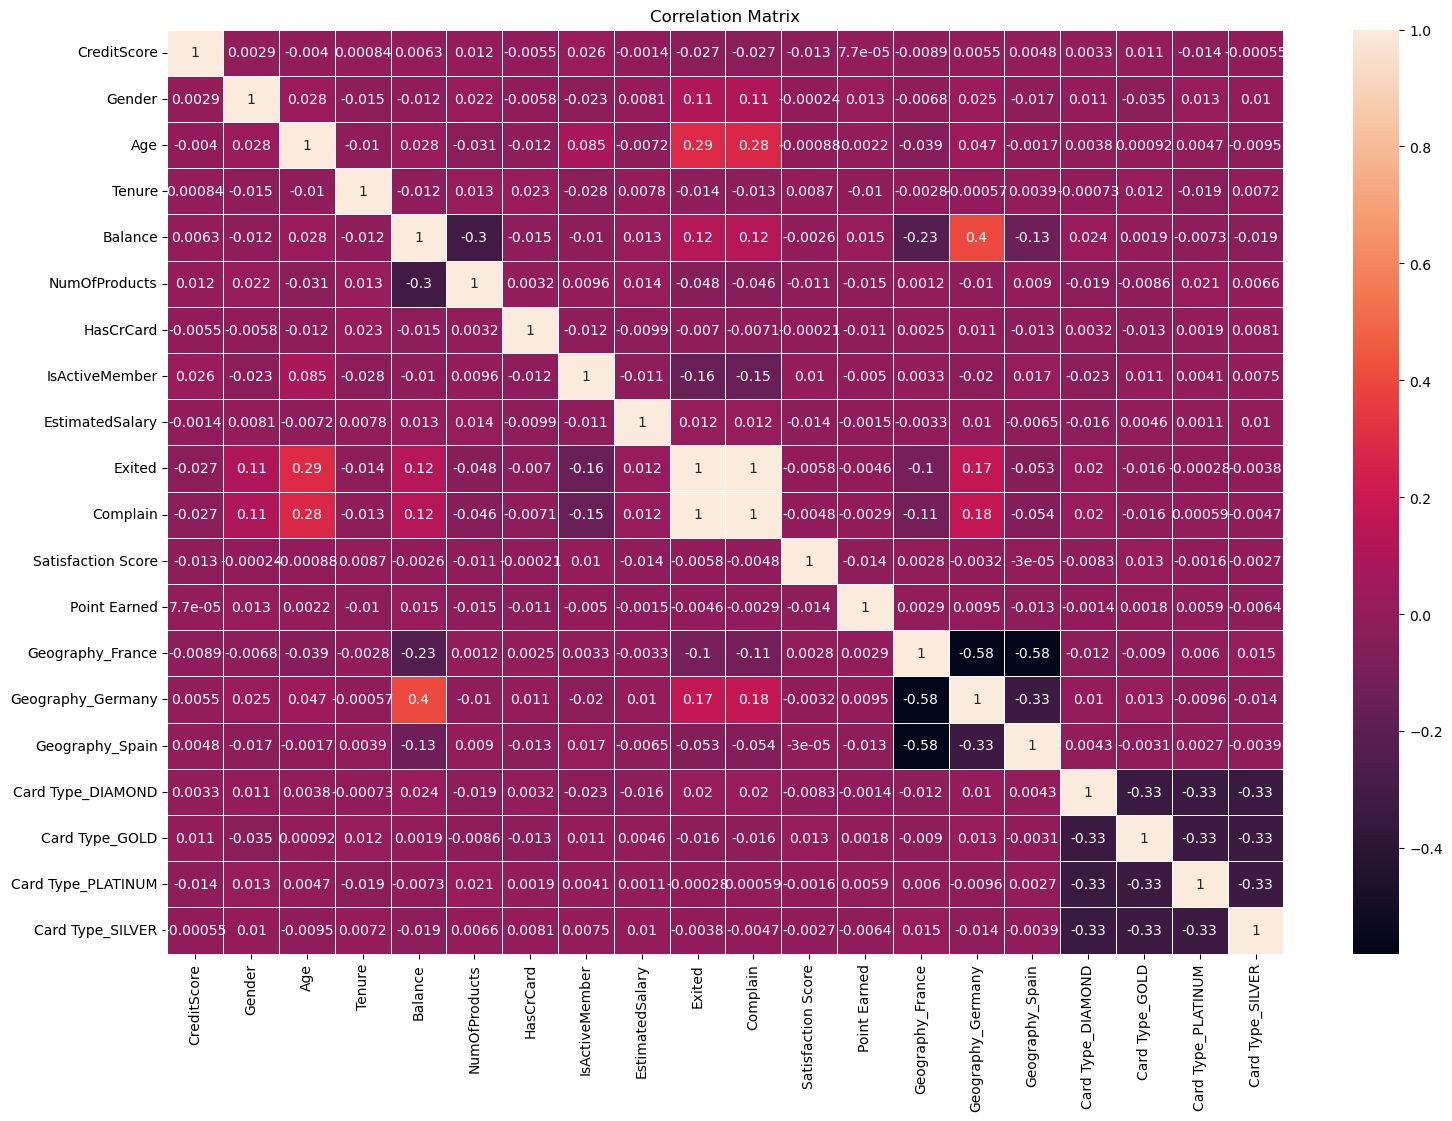

In [59]:
correlation_matrix = df.corr()

plt.figure(figsize=(18, 12))
sns.heatmap(correlation_matrix, annot=True, linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [60]:
df = df.drop(columns = "Complain")

## 7. VIF

In [62]:
def calc_vif(X):
# Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i)
    for i in range(X.shape[1])]
    return(vif)

df2 = df[['Gender', 'Tenure', 'Balance', 
          'NumOfProducts', 'HasCrCard', 'IsActiveMember', 
          'Satisfaction Score', 'Point Earned', 
          'Geography_France', 'Geography_Germany', 'Card Type_DIAMOND',
          'Card Type_GOLD', 'Card Type_PLATINUM']]
calc_vif(df2)

,variables,VIF
0,Gender,1.799563
1,Tenure,3.689322
2,Balance,2.958655
3,NumOfProducts,6.479766
4,HasCrCard,3.176502
5,IsActiveMember,1.998983
6,Satisfaction Score,4.889356
7,Point Earned,6.594301
8,Geography_France,2.811836
9,Geography_Germany,2.280412


## 8. Train and Test data set

In [63]:
# x : List of remaining independent variables in the dataset
# y : churn

response = df["Exited"]
df = df.drop(columns = "Exited")

In [64]:
# Use stratify parameter to resolve any class imbalance
X_train, X_test, y_train, y_test = train_test_split(df, response, stratify=response, test_size=0.3, random_state=42)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (7000, 18)
Number transactions y_train dataset:  (7000,)
Number transactions X_test dataset:  (3000, 18)
Number transactions y_test dataset:  (3000,)


## 9. Data Scaling

In [65]:
standard_scaler = StandardScaler()

X_train2 = pd.DataFrame(standard_scaler.fit_transform(X_train))
X_train2.columns = X_train.columns.values
X_train2.index = X_train.index.values
X_train = X_train2

X_test2 = pd.DataFrame(standard_scaler.transform(X_test))
X_test2.columns = X_test.columns.values
X_test2.index = X_test.index.values
X_test = X_test2

## 10. Modelling

In [67]:
X_train.columns = X_train.columns.str.replace(' ', '_')
X_test.columns = X_test.columns.str.replace(' ', '_')

### 10.1. Logistic Regression

In [69]:
# Fitting Logistic Regression to the Training set

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Evaluate results
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
f2 = fbeta_score(y_test, y_pred, beta=2.0)
results = pd.DataFrame([['Logistic Regression', acc, prec, rec, f1, f2]], 
                        columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])
results = results.sort_values(["Precision", "Recall", "F2 Score"], ascending = False)
print(results)

                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  Logistic Regression     0.815   0.633333  0.217676  0.323995  0.250565


### 10.2. K-Nearest Neighbours

Max Score: 0.8216666666666667 at n_estimators = 17


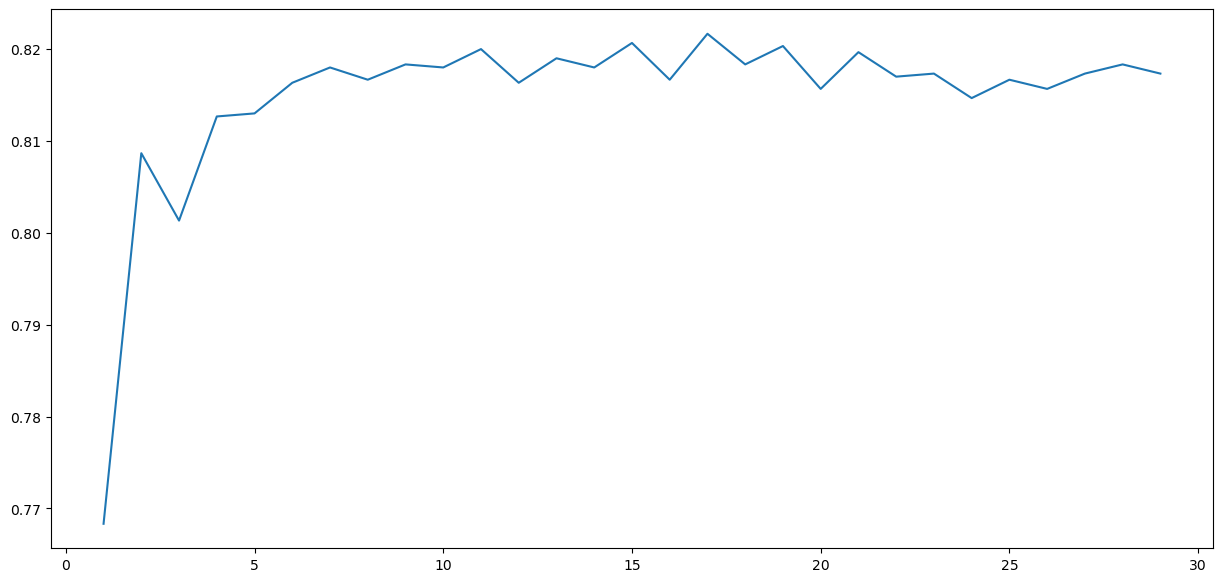

In [71]:
# Identify optimal number of K neighbors for KNN Model

score_array = []
for each in range(1,30):
    knn_loop = KNeighborsClassifier(n_neighbors = each)
    knn_loop.fit(X_train, y_train)
    score_array.append(knn_loop.score(X_test, y_test))

fig = plt.figure(figsize=(15,7))
plt.plot(range(1,30), score_array)

# print(score_array)
print(f"Max Score: {max(score_array)} at n_estimators = {score_array.index(max(score_array)) + 1}")

plt.show()

# optimal numver of K = 17

In [72]:
# Fitting KNN to the Training set

classifier = KNeighborsClassifier(
    n_neighbors = 17,
    metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Evaluate results
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([['K-Nearest Neighbours', acc, prec, rec, f1, f2]], 
                        columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])
results = pd.concat([results, model_results], ignore_index=True)
results = results.sort_values(["Precision", "Recall", "F2 Score"], ascending = False)
print(results)

                  Model  Accuracy  Precision    Recall  F1 Score  F2 Score
1  K-Nearest Neighbours  0.821667   0.746753  0.188216  0.300654  0.221324
0   Logistic Regression  0.815000   0.633333  0.217676  0.323995  0.250565


### 10.3. Naive Bayes

In [74]:
# Fitting Naive Bayes to the Training set
    
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predicting the Test set results 
y_pred = classifier.predict(X_test)

#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)

model_results = pd.DataFrame([['Naive Bayes', acc, prec, rec, f1, f2]],
                columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])

results = pd.concat([results, model_results], ignore_index=True)
results = results.sort_values(["Precision", "Recall", "F2 Score"], ascending = False)
print(results)

                  Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  K-Nearest Neighbours  0.821667   0.746753  0.188216  0.300654  0.221324
1   Logistic Regression  0.815000   0.633333  0.217676  0.323995  0.250565
2           Naive Bayes  0.816000   0.572482  0.381342  0.457760  0.408629


### 10.4. Decision Tree

In [76]:
# Fitting Decision Tree to the Training set

classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results 
y_pred = classifier.predict(X_test)

#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)

model_results = pd.DataFrame([['Decision Tree', acc, prec, rec, f1, f2]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])

results = pd.concat([results, model_results], ignore_index=True)
results = results.sort_values(["Precision", "Recall", "F2 Score"], ascending = False)
print(results)

                  Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  K-Nearest Neighbours  0.821667   0.746753  0.188216  0.300654  0.221324
1   Logistic Regression  0.815000   0.633333  0.217676  0.323995  0.250565
2           Naive Bayes  0.816000   0.572482  0.381342  0.457760  0.408629
3         Decision Tree  0.795333   0.497653  0.520458  0.508800  0.515731


### 10.5. Random forest

Max Score: 0.868 at n_estimators = 91


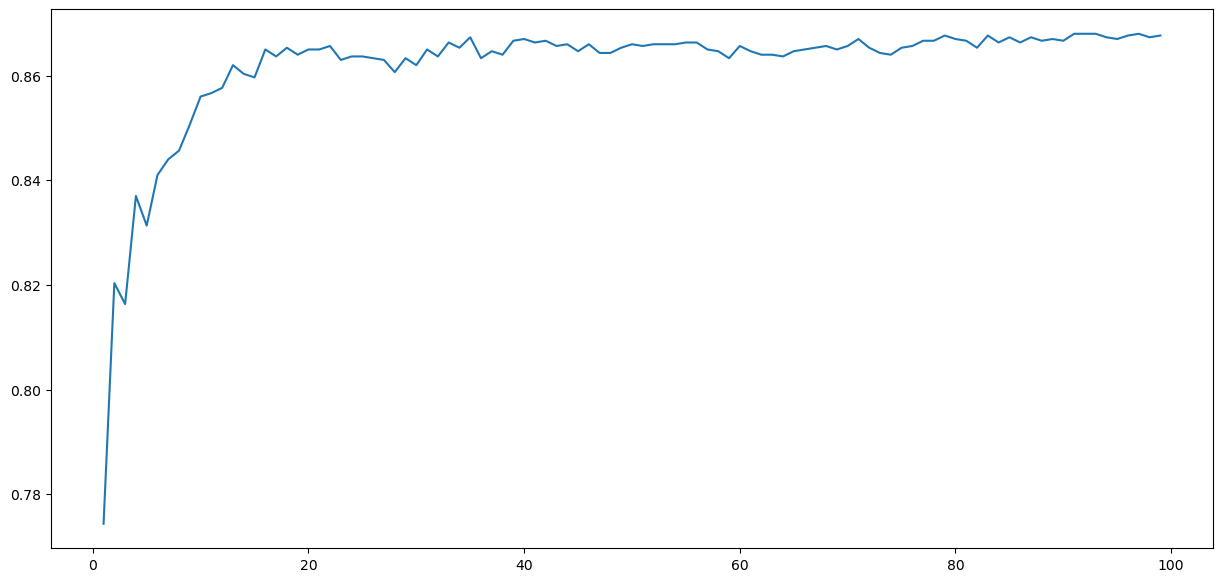

In [78]:
#Identify optimal number of trees for Random Forest Model
 
score_array = []
for each in range(1,100):
    rf_loop = RandomForestClassifier(n_estimators = each, random_state = 1) 
    rf_loop.fit(X_train,y_train)
    score_array.append(rf_loop.score(X_test,y_test))
 
fig = plt.figure(figsize=(15, 7))
plt.plot(range(1,100),score_array)

print(f"Max Score: {max(score_array)} at n_estimators = {score_array.index(max(score_array)) + 1}")

plt.show()

# optimal = 91

In [79]:
# Fitting Random Forest to the Training set:
    
classifier = RandomForestClassifier(n_estimators = 91, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results 
y_pred = classifier.predict(X_test)

#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)

model_results = pd.DataFrame([['Random Forest', acc, prec, rec, f1, f2]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])

results = pd.concat([results, model_results], ignore_index=True)
results = results.sort_values(["Precision", "Recall", "F2 Score"], ascending = False)
print(results)

                  Model  Accuracy  Precision    Recall  F1 Score  F2 Score
4         Random Forest  0.869000   0.793011  0.482815  0.600203  0.523793
0  K-Nearest Neighbours  0.821667   0.746753  0.188216  0.300654  0.221324
1   Logistic Regression  0.815000   0.633333  0.217676  0.323995  0.250565
2           Naive Bayes  0.816000   0.572482  0.381342  0.457760  0.408629
3         Decision Tree  0.795333   0.497653  0.520458  0.508800  0.515731


### 10.6. XGBoost

Max Score: 0.869 at n_estimators = 10


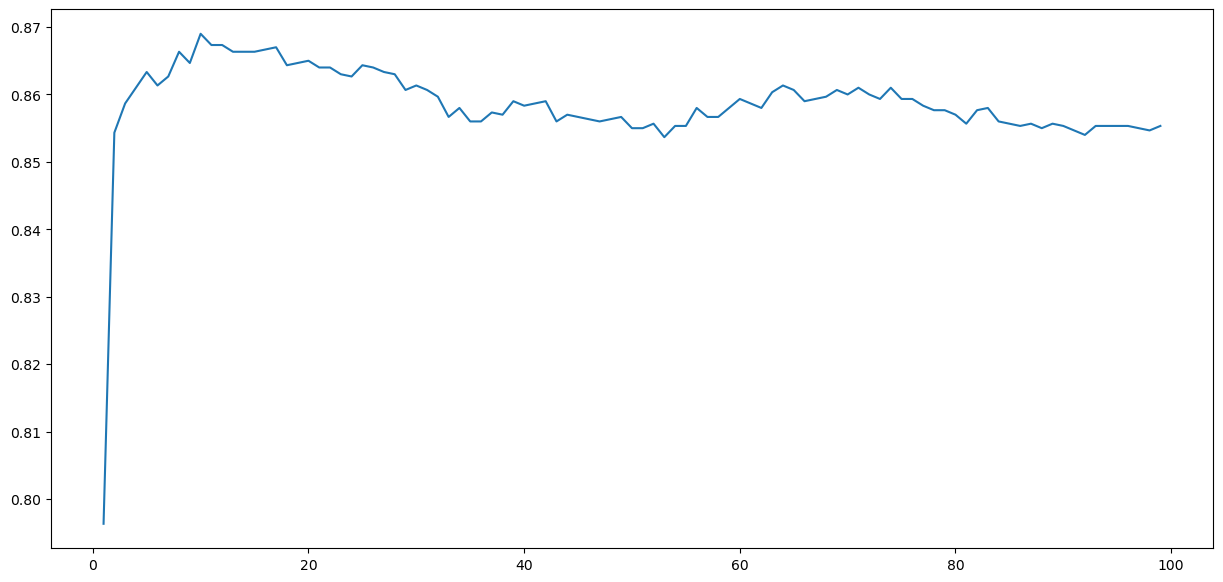

In [81]:
#Identify optimal number of trees for XGBoost Model
 
score_array = []
for each in range(1,100):
    rf_loop = XGBClassifier(n_estimators = each, random_state = 1) 
    rf_loop.fit(X_train,y_train)
    score_array.append(rf_loop.score(X_test,y_test))
 
fig = plt.figure(figsize=(15, 7))
plt.plot(range(1,100),score_array)

print(f"Max Score: {max(score_array)} at n_estimators = {score_array.index(max(score_array)) + 1}")

plt.show()

# optimal = 10

In [82]:
# Fitting XGBoost to the Training set
    
classifier = XGBClassifier(n_estimators = 10, random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results 
y_pred = classifier.predict(X_test)

#Evaluate results
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
f2 = fbeta_score(y_test, y_pred, beta=2.0)

model_results = pd.DataFrame([['XGBoost', acc, prec, rec, f1, f2]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])

results = pd.concat([results, model_results], ignore_index=True)
results = results.sort_values(["Precision", "Recall", "F2 Score"], ascending = False)
print(results)

                  Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0         Random Forest  0.869000   0.793011  0.482815  0.600203  0.523793
5               XGBoost  0.869000   0.789894  0.486088  0.601824  0.526596
1  K-Nearest Neighbours  0.821667   0.746753  0.188216  0.300654  0.221324
2   Logistic Regression  0.815000   0.633333  0.217676  0.323995  0.250565
3           Naive Bayes  0.816000   0.572482  0.381342  0.457760  0.408629
4         Decision Tree  0.795333   0.497653  0.520458  0.508800  0.515731


### 10.7. LightGBM

[LightGBM] [Info] Number of positive: 1427, number of negative: 5573
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000719 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1137
[LightGBM] [Info] Number of data points in the train set: 7000, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.203857 -> initscore=-1.362359
[LightGBM] [Info] Start training from score -1.362359
[LightGBM] [Info] Number of positive: 1427, number of negative: 5573
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000398 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1137
[LightGBM] [Info] Number of data points in the train set: 7000, number of used features: 18
[LightGBM] [Info] [binar

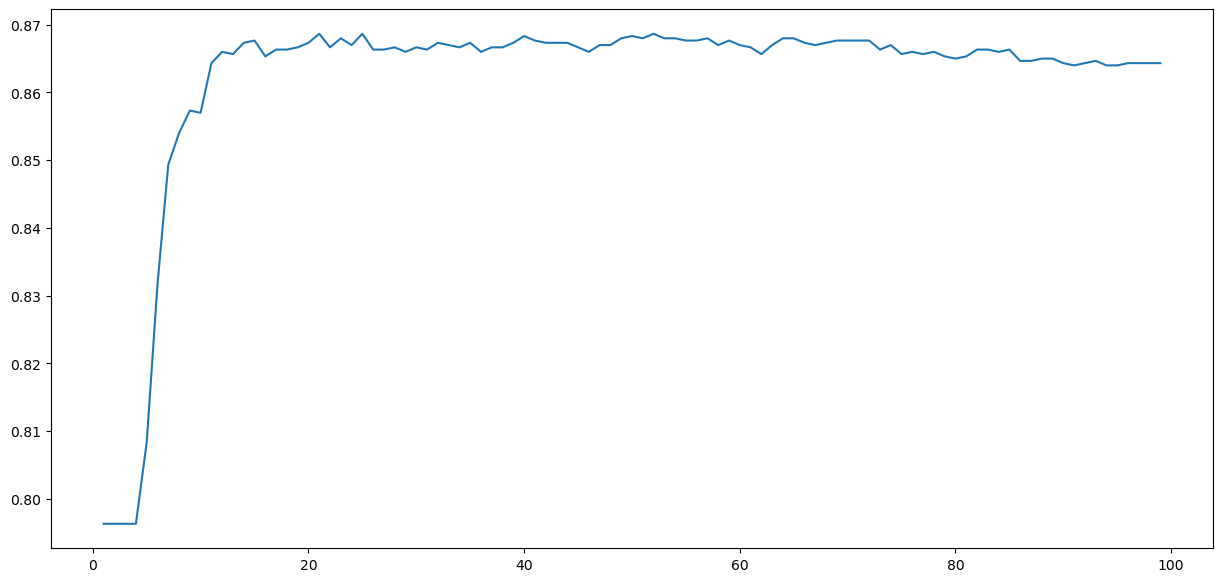

In [84]:
#Identify optimal number of trees for LightGBM Model:
 
score_array = []
for each in range(1,100):
    rf_loop = LGBMClassifier(n_estimators = each, random_state = 1) 
    rf_loop.fit(X_train,y_train)
    score_array.append(rf_loop.score(X_test,y_test))
 
fig = plt.figure(figsize=(15, 7))
plt.plot(range(1,100),score_array)

print(f"Max Score: {max(score_array)} at n_estimators = {score_array.index(max(score_array)) + 1}")

plt.show()

# optimal = 21

In [85]:
# Fitting LightGBM to the Training set
    
classifier = LGBMClassifier(n_estimators = 21, random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results 
y_pred = classifier.predict(X_test)

#Evaluate results
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)

model_results = pd.DataFrame([['LightGBM', acc, prec, rec, f1, f2]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])

results = pd.concat([results, model_results], ignore_index=True)
results = results.sort_values(["Precision", "Recall", "F2 Score"], ascending = False)
print(results)

[LightGBM] [Info] Number of positive: 1427, number of negative: 5573
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000546 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1137
[LightGBM] [Info] Number of data points in the train set: 7000, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.203857 -> initscore=-1.362359
[LightGBM] [Info] Start training from score -1.362359
                  Model  Accuracy  Precision    Recall  F1 Score  F2 Score
6              LightGBM  0.868667   0.797260  0.476268  0.596311  0.517978
0         Random Forest  0.869000   0.793011  0.482815  0.600203  0.523793
1               XGBoost  0.869000   0.789894  0.486088  0.601824  0.526596
2  K-Nearest Neighbours  0.821667   0.746753  0.188216  0.300654  0.221324
3   Logistic Regression  0.815000   0.633333  0.217676  0.323995  0.25

## 11. Conclusion

#### XGBoost has the highest accuracy, F1 score, and F2 score, along with competitive recall, making it the best choice for a balanced performance across multiple metrics

In [88]:
classifier = XGBClassifier(random_state = 0)
classifier.fit(X_train, y_train)

# Predict the Test set results
y_pred = classifier.predict(X_test)

#Evaluate Model Results on Test Set:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
f2 = fbeta_score(y_test, y_pred, beta=2.0)

results = pd.DataFrame([['XGBoost', acc, prec, rec, f1, f2]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])

print (results)

     Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  XGBoost  0.855333   0.694505  0.517185  0.592871  0.545016


In [89]:
# Re-check k-Fold Cross Validation
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("XGBoost Classifier Accuracy: %0.2f (+/- %0.2f)"  % (accuracies.mean(), accuracies.std() * 2))

XGBoost Classifier Accuracy: 0.85 (+/- 0.02)


### This indicates that the accuracy is between 83% and 87% on the test set

Text(0.5, 25.52222222222222, 'Predicted label\n')

<Figure size 2800x2000 with 0 Axes>

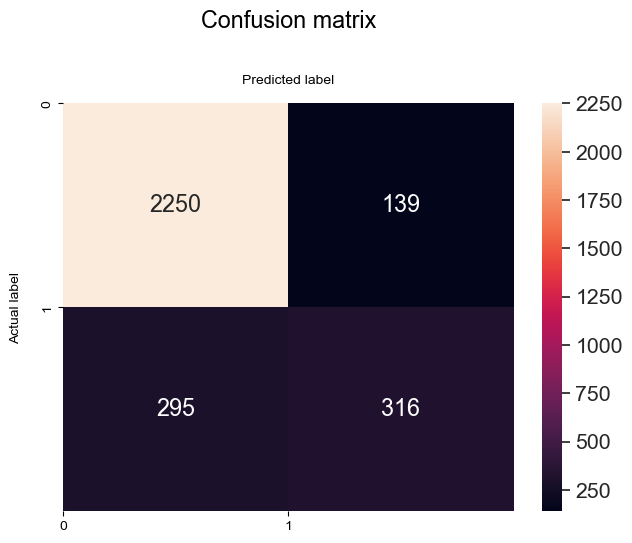

In [91]:
# Visualize results on a Confusion Matrix

cm = confusion_matrix(y_test, y_pred) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))

fig, ax = plt.subplots()
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g'#,cmap="YlGnBu" 
           )
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')

#### TP(2250): The model correctly predicted that 2250 instances will not churn
#### FN(139): The model incorrectly predicted that 139 instances would churn when they actually did not
#### FP(295): The model incorrectly predicted that 295 instances would not churn when they actually did
#### TN(316): The model correctly predicted that 316 instances will churn